In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
data=pd.read_csv('/content/sample_data/mnist_train_small.csv')

In [ ]:
X=data.drop(columns=['6']).values
y=data['6'].values

In [ ]:
X.shape

(19999, 784)

In [ ]:
y.shape

(19999,)

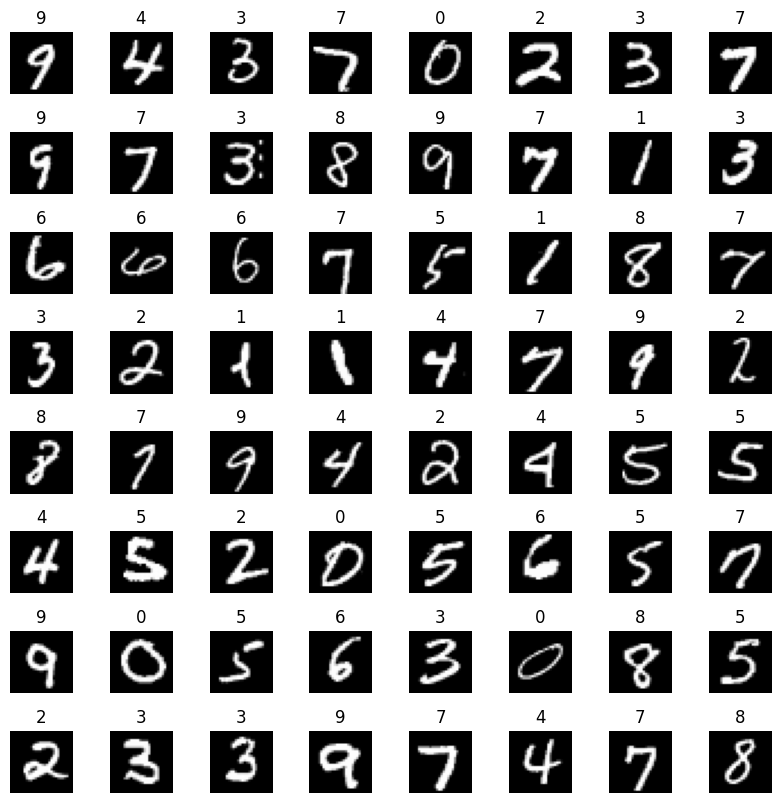

In [ ]:
m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):

    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and reshape the image
    X_random_reshaped = X[random_index].reshape((28, 28))

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image (use single index for 1D y array)
    ax.set_title(y[random_index])  # Fix: Use y[random_index] instead of y[random_index, 0]
    ax.set_axis_off()

plt.show()


In [ ]:
model = Sequential([
    Input(shape=(784,)),  # Input layer specifying the shape of input data
    Dense(25, activation='relu'),
    Dense(15, activation='relu'),
    Dense(10, activation='linear')  # No activation function here
])


In [ ]:
# Compile the model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Use logits=True for numerical stability
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

In [ ]:
# Train the model
history = model.fit(
    X,
    y,  # Use integer labels if using SparseCategoricalCrossentropy
    epochs=10,
    batch_size=32
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1164 - loss: 4.9900
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1865 - loss: 2.1501
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2843 - loss: 1.9152
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3444 - loss: 1.7292
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3946 - loss: 1.5282
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4105 - loss: 1.4293
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4914 - loss: 1.2827
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5672 - loss: 1.1413
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6129 - loss: 0.9930
Epoch 10/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6972 - loss: 0.8263
